In [88]:
import pandas as pd

TRANSACTION_COLUMNS = ['isFraud',
 'TransactionAmt', 'ProductCD',
 'card1','card2','card3','card4','card5','card6',
 'addr1','addr2',
 'dist1','dist2',
 'P_emaildomain','R_emaildomain',
 'C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14',
 'D1','D2','D3','D4','D5','D6','D7','D8','D9','D10','D11','D12','D13','D14','D15'
                      ]

CATEGORICAL_TRANSCATION = [
    'ProductCD',
    'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
    'addr1', 'addr2',
    'P_emaildomain','R_emaildomain']

In [89]:
transaction = pd.read_csv('data/train_transaction.csv',usecols=TRANSACTION_COLUMNS, nrows=200000)


In [90]:
transaction.sample(10)

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
159433,0,29.000,W,6877,550.0,150.0,visa,226.0,debit,272.0,...,NaN,NaN,NaN,NaN,168.0,NaN,NaN,NaN,NaN,335.0
53269,0,49.000,W,16085,297.0,150.0,visa,166.0,debit,441.0,...,NaN,NaN,NaN,NaN,291.0,291.0,NaN,NaN,NaN,291.0
135977,0,47.950,W,4663,490.0,150.0,visa,166.0,debit,315.0,...,NaN,NaN,NaN,NaN,0.0,28.0,NaN,NaN,NaN,58.0
84897,0,77.000,W,8613,272.0,150.0,mastercard,224.0,debit,251.0,...,NaN,NaN,NaN,NaN,286.0,286.0,NaN,NaN,NaN,346.0
58848,0,500.000,W,13457,543.0,150.0,mastercard,224.0,debit,204.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0
120954,0,5.247,C,5666,515.0,119.0,visa,137.0,credit,NaN,...,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0
53182,1,59.000,W,2616,NaN,150.0,discover,102.0,credit,204.0,...,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,6.0
6006,0,53.970,W,4806,490.0,150.0,visa,226.0,debit,315.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
105706,0,10.611,C,13050,469.0,203.0,mastercard,195.0,credit,NaN,...,3.0,1.0,NaN,NaN,0.0,NaN,3.0,0.0,0.0,3.0
107500,0,50.000,R,16141,399.0,150.0,american express,185.0,credit,337.0,...,NaN,NaN,402.708344,0.708333,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 44 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   isFraud         200000 non-null  int64  
 1   TransactionAmt  200000 non-null  float64
 2   ProductCD       200000 non-null  object 
 3   card1           200000 non-null  int64  
 4   card2           196974 non-null  float64
 5   card3           199997 non-null  float64
 6   card4           199991 non-null  object 
 7   card5           198933 non-null  float64
 8   card6           199993 non-null  object 
 9   addr1           178608 non-null  float64
 10  addr2           178608 non-null  float64
 11  dist1           68366 non-null   float64
 12  dist2           15519 non-null   float64
 13  P_emaildomain   167841 non-null  object 
 14  R_emaildomain   63648 non-null   object 
 15  C1              200000 non-null  float64
 16  C2              200000 non-null  float64
 17  C3        

In [92]:
transaction_pos = transaction[transaction['isFraud']==1]
transaction_neg = transaction[transaction['isFraud']==0].sample(60000) #in order to create a balanced dataset we do .sample()

transaction_pos.shape, transaction_neg.shape

((6024, 45), (60000, 45))

In [93]:
transaction = pd.concat([transaction_pos, transaction_neg], axis=0)

In [94]:
transaction_pos.sample(10)

,TransactionID,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
184408,184408,1,300.000,H,17998,215.0,150.0,mastercard,203.0,credit,...,NaN,NaN,0.291666,0.291666,NaN,NaN,NaN,NaN,NaN,NaN
90566,90566,1,23.087,C,10876,104.0,185.0,visa,137.0,credit,...,55.0,0.0,59.833332,0.833333,0.0,NaN,55.0,55.0,55.0,55.0
156471,156471,1,59.000,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0
11043,11043,1,39.000,W,16727,111.0,150.0,visa,226.0,credit,...,NaN,NaN,NaN,NaN,103.0,NaN,NaN,NaN,NaN,NaN
165216,165216,1,32.356,C,3154,408.0,185.0,mastercard,224.0,debit,...,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,240.0,0.0
110290,110290,1,139.220,C,9026,545.0,185.0,visa,137.0,credit,...,2.0,0.0,6.958333,0.958333,0.0,NaN,2.0,1.0,0.0,2.0
14689,14689,1,160.475,C,9635,405.0,185.0,visa,226.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50542,50542,1,187.726,C,2256,545.0,185.0,visa,226.0,credit,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
132009,132009,1,300.000,R,7381,583.0,150.0,mastercard,102.0,credit,...,NaN,NaN,0.375000,0.375000,NaN,NaN,NaN,NaN,NaN,NaN
30355,30355,1,46.698,C,10369,176.0,185.0,mastercard,137.0,credit,...,0.0,NaN,151.791672,0.791666,0.0,NaN,0.0,0.0,0.0,0.0


In [95]:
from category_encoders import OrdinalEncoder, OneHotEncoder

ordinal_encoder = OrdinalEncoder(cols=CATEGORICAL_TRANSCATION, handle_missing='return_nan')

transaction = ordinal_encoder.fit_transform(transaction)
transaction.head()

,TransactionID,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
203,203,1,445.000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,374.0
240,240,1,37.098,2.0,2.0,2.0,2.0,1.0,2.0,1.0,...,0.0,NaN,45.041664,0.041666,0.0,NaN,0.0,0.0,0.0,0.0
243,243,1,37.098,2.0,2.0,2.0,2.0,1.0,2.0,1.0,...,0.0,0.0,45.041664,0.041666,0.0,NaN,0.0,0.0,0.0,0.0
245,245,1,37.098,2.0,2.0,2.0,2.0,1.0,2.0,1.0,...,0.0,0.0,45.041664,0.041666,0.0,NaN,0.0,0.0,0.0,0.0
288,288,1,155.521,2.0,3.0,3.0,2.0,1.0,1.0,1.0,...,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0


In [96]:
from sklearn.model_selection import train_test_split

transaction_train, transaction_test = train_test_split(transaction, stratify=transaction['isFraud'], test_size=0.2, random_state=1234)

In [97]:
transaction_train.shape, transaction_test.shape

((52819, 45), (13205, 45))

In [98]:
transaction_train.to_csv('data/train.csv',index=None)
transaction_test.to_csv('data/test.csv',index=None)

In [101]:
table = transaction_train[['TransactionID','isFraud']].head()

In [83]:
transaction_train.head()

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15
TransactionID,,,,,,,,,,,,,,,,,,,,,
80730,0,22.387,2.0,43.0,5.0,2.0,2.0,2.0,1.0,NaN,...,0.0,NaN,71.041664,0.041666,0.0,NaN,0.0,0.0,0.0,0.0
153942,0,21.105,2.0,6.0,6.0,2.0,2.0,5.0,2.0,NaN,...,0.0,NaN,242.833328,0.833333,0.0,NaN,0.0,0.0,0.0,0.0
164299,0,105.950,1.0,33.0,27.0,1.0,1.0,1.0,2.0,7.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,431.0
141281,1,39.000,1.0,14.0,12.0,1.0,1.0,1.0,2.0,15.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
192265,0,448.830,1.0,83.0,19.0,1.0,2.0,8.0,1.0,9.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0


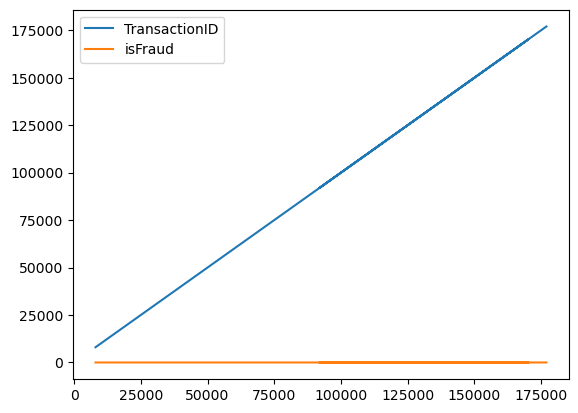

In [102]:
ax = table.plot()
fig = ax.get_figure()
fig.savefig('asdf.png')